In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nerf2.runner import Runner, DataInfo, ImageInfo
from mri2 import simulation, utility
import loader

###
path_data = '../NeRF_MR/data/brain/file_brain_AXFLAIR_200_6002462.h5'
z = 0
img = loader.loadNYU(path_data)[z : z+1]
num_angles = utility.getMinimalSpokes(img.shape)

###
name = 'file_brain_AXFLAIR_200_6002462_{0:02d}'.format(z)
af = 10
mode = 'golden'
angles = utility.getAngles(int(num_angles/af), mode, 0, np.pi)
data = simulation.makeMeasuredData(img, angles, is_incribed=True)

datainfo = DataInfo(name, data, angles, af, mode)

###
runner = Runner(datainfo, 'config_brain', device=0)

In [2]:
runner.train(True, 2000)

training
name     : file_brain_AXFLAIR_200_6002462_00
AF       : 10
# angles : 050
mode     : golden


  0%|          | 0/100 [00:00<?, ?it/s]

Output()

False

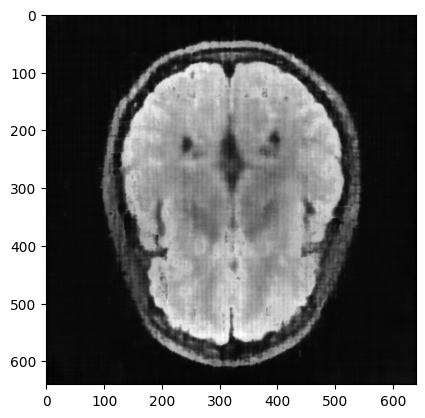

In [3]:
import glob
name = 'file_brain_AXFLAIR_200_6002462_{0:02d}'.format(z)
path = sorted(glob.glob('./nerf2/results/config_brain/{0}/af_{1:02d}/{2}/*'.format(name, af, mode)))[-1]
ckpt = sorted(glob.glob(path + '/*.pt'))[-1]
imageinfo = ImageInfo([640,640,1], [.5,.5,.5])
recon = runner.infer(imageinfo, ckpt)
plt.imshow(recon[0], 'gray')